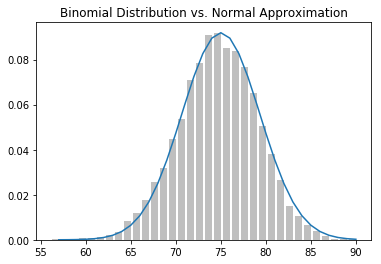

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
def normal_pdf(x, mu=0,sigma=1):
    return math.exp(-(x-mu)**2/2/sigma**2)/(math.sqrt(2*math.pi)*sigma)
    
xs = [x / 10.0 for x in range(-50, 50)]
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# x1+x2+...+xn  - (mu)*n
#--------------------------  ~ N(0,1)
#      sigma*sqrt(n)

import random
import collections
# example with Binomial trials
def bernoulli_trial(p):
    return 1 if random.random()<p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
# use a bar chart to show the actual binomial samples
    histogram = collections.Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],[v / num_points for v in histogram.values()],0.8,color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
make_hist(0.75, 100, 10000)